## Entrenamiento de YOLOv11 con las imágenes RGB (no correr)

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="7Hz3eeowofFbvAHC6OmK")
project = rf.workspace("tpfinalvisionwildlife").project("tp_final_wildlife_rgb")
version = project.version(4)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tp_final_wildlife_rgb-4 in yolov11:: 100%|██████████| 340/340 [00:00<00:00, 3012.06it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 309MB/s]
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/tp_final_wildlife_rgb-4/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch721.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch722.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1732743807.bf1272e793ff.3476.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch720.jpg


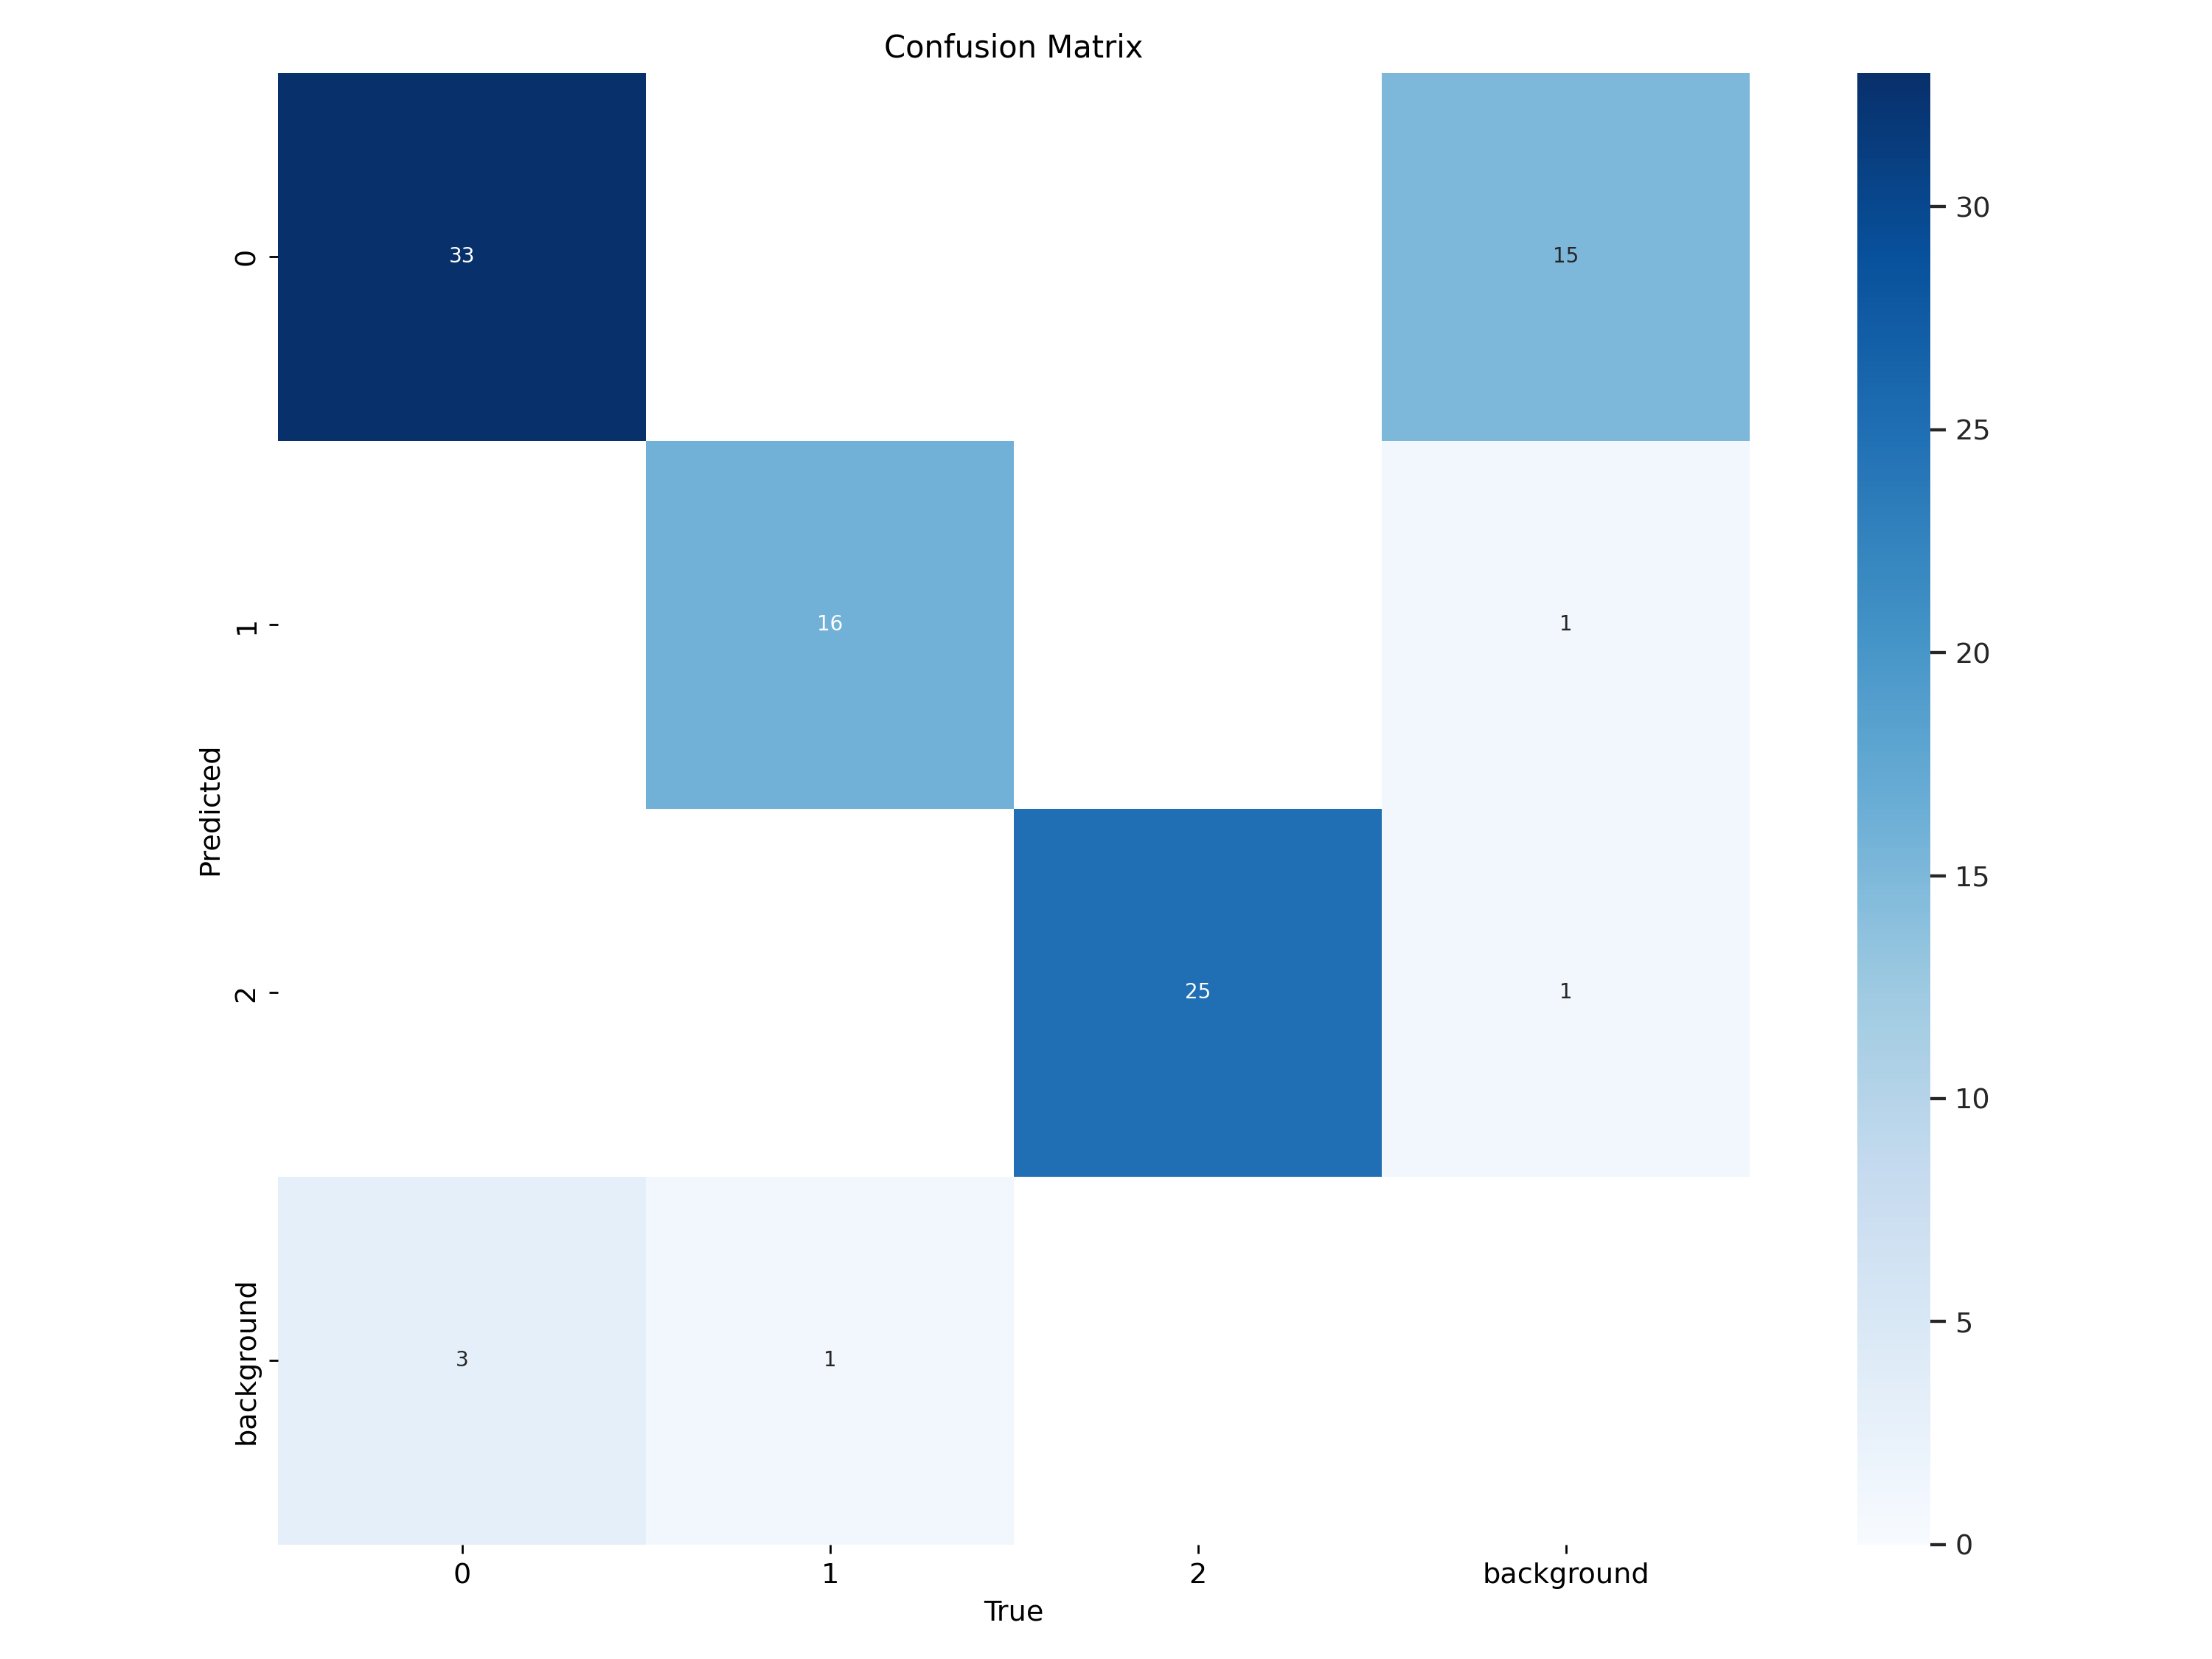

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

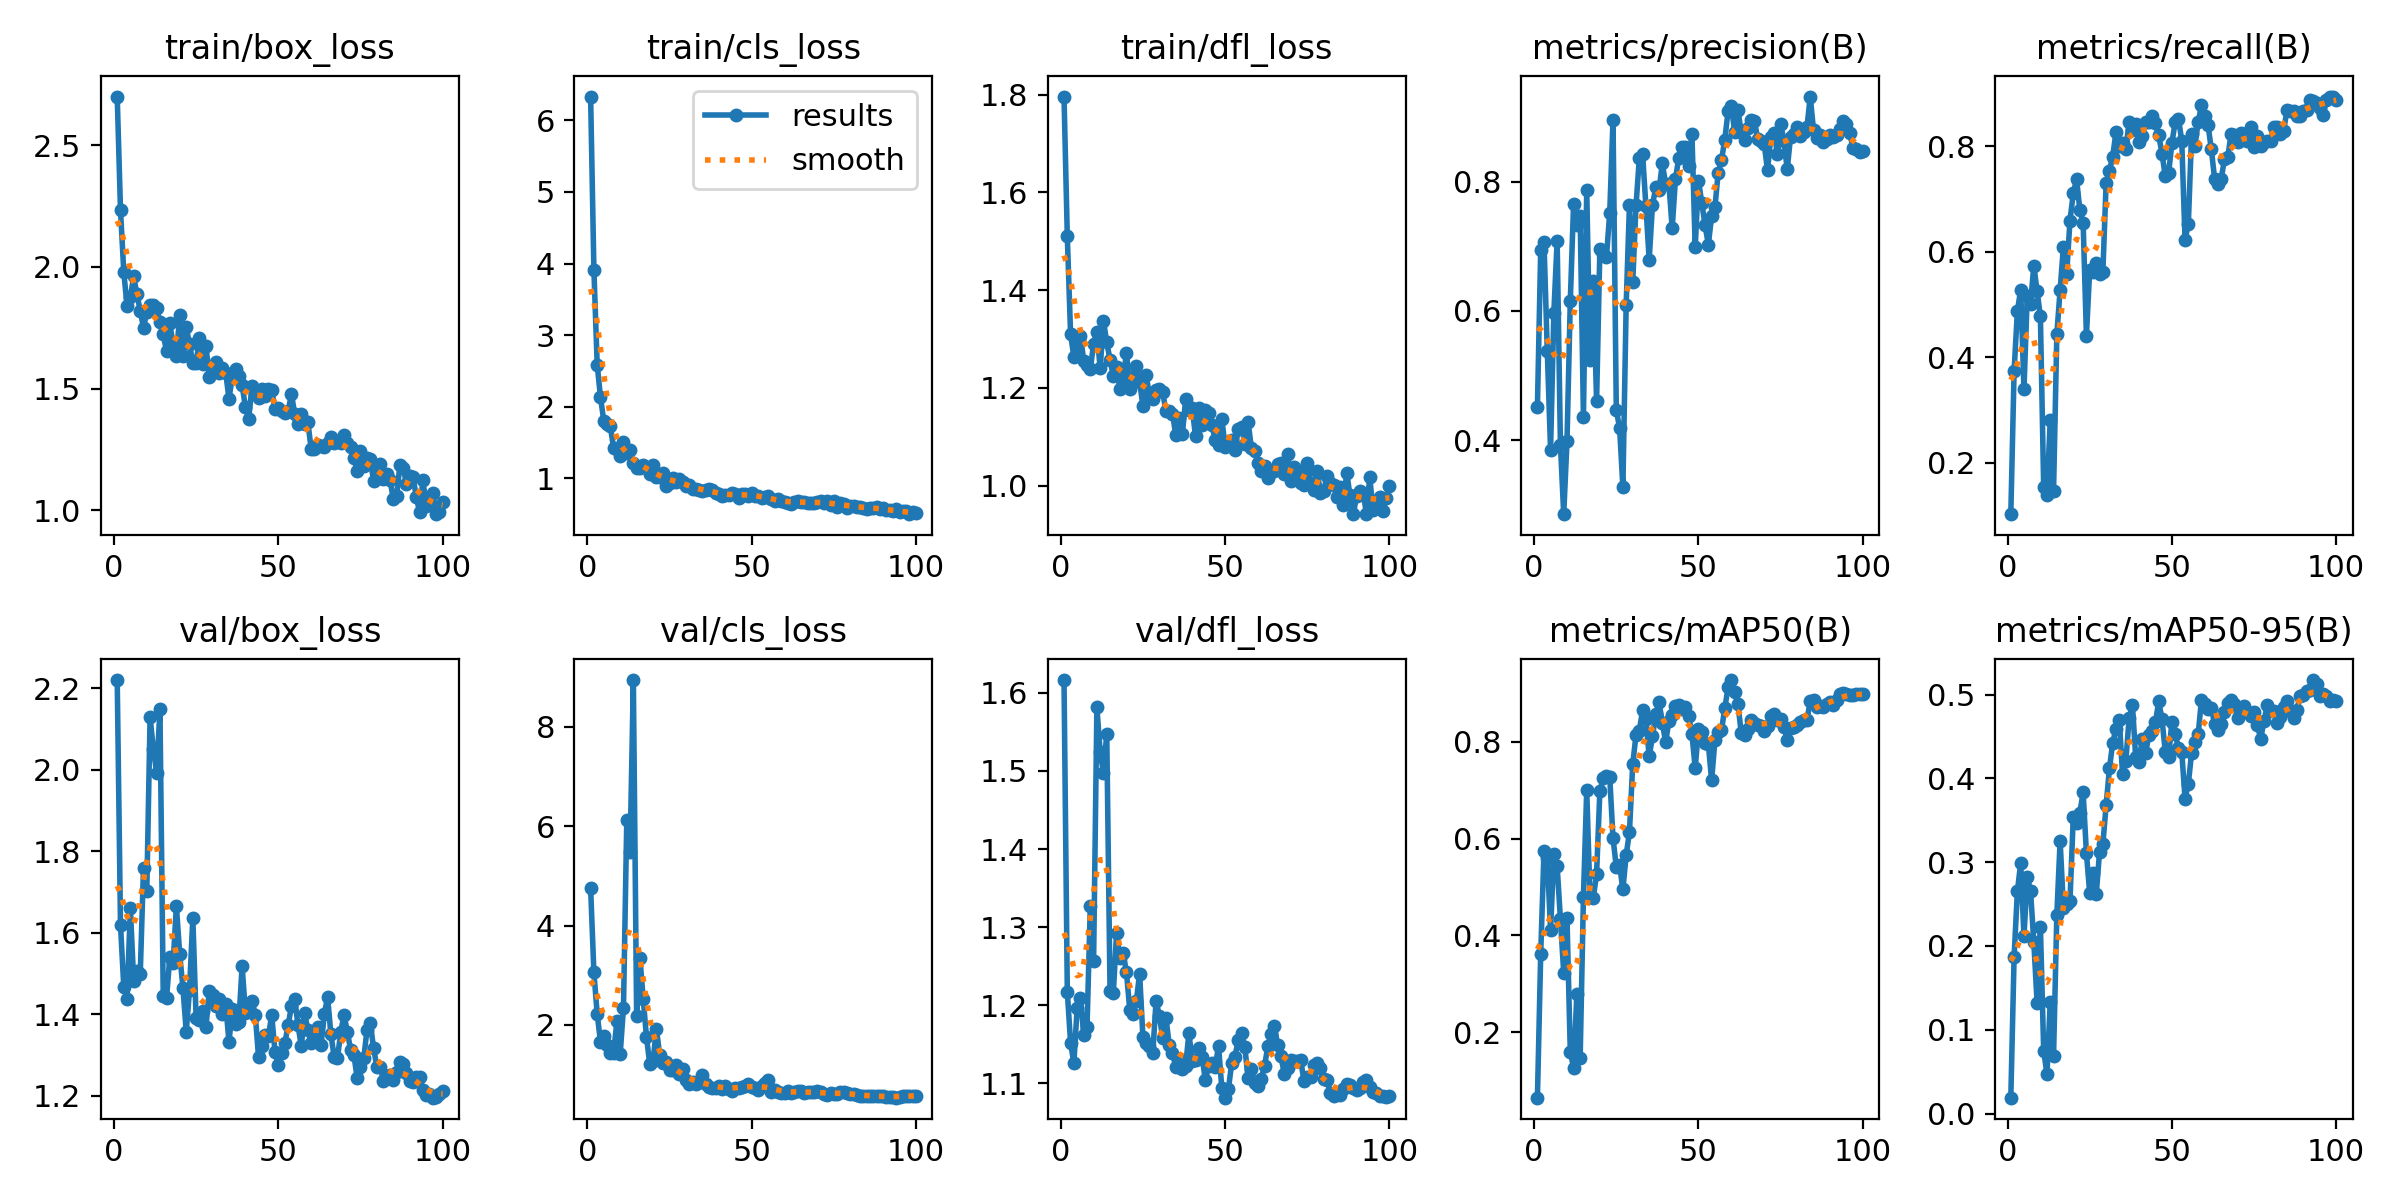

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

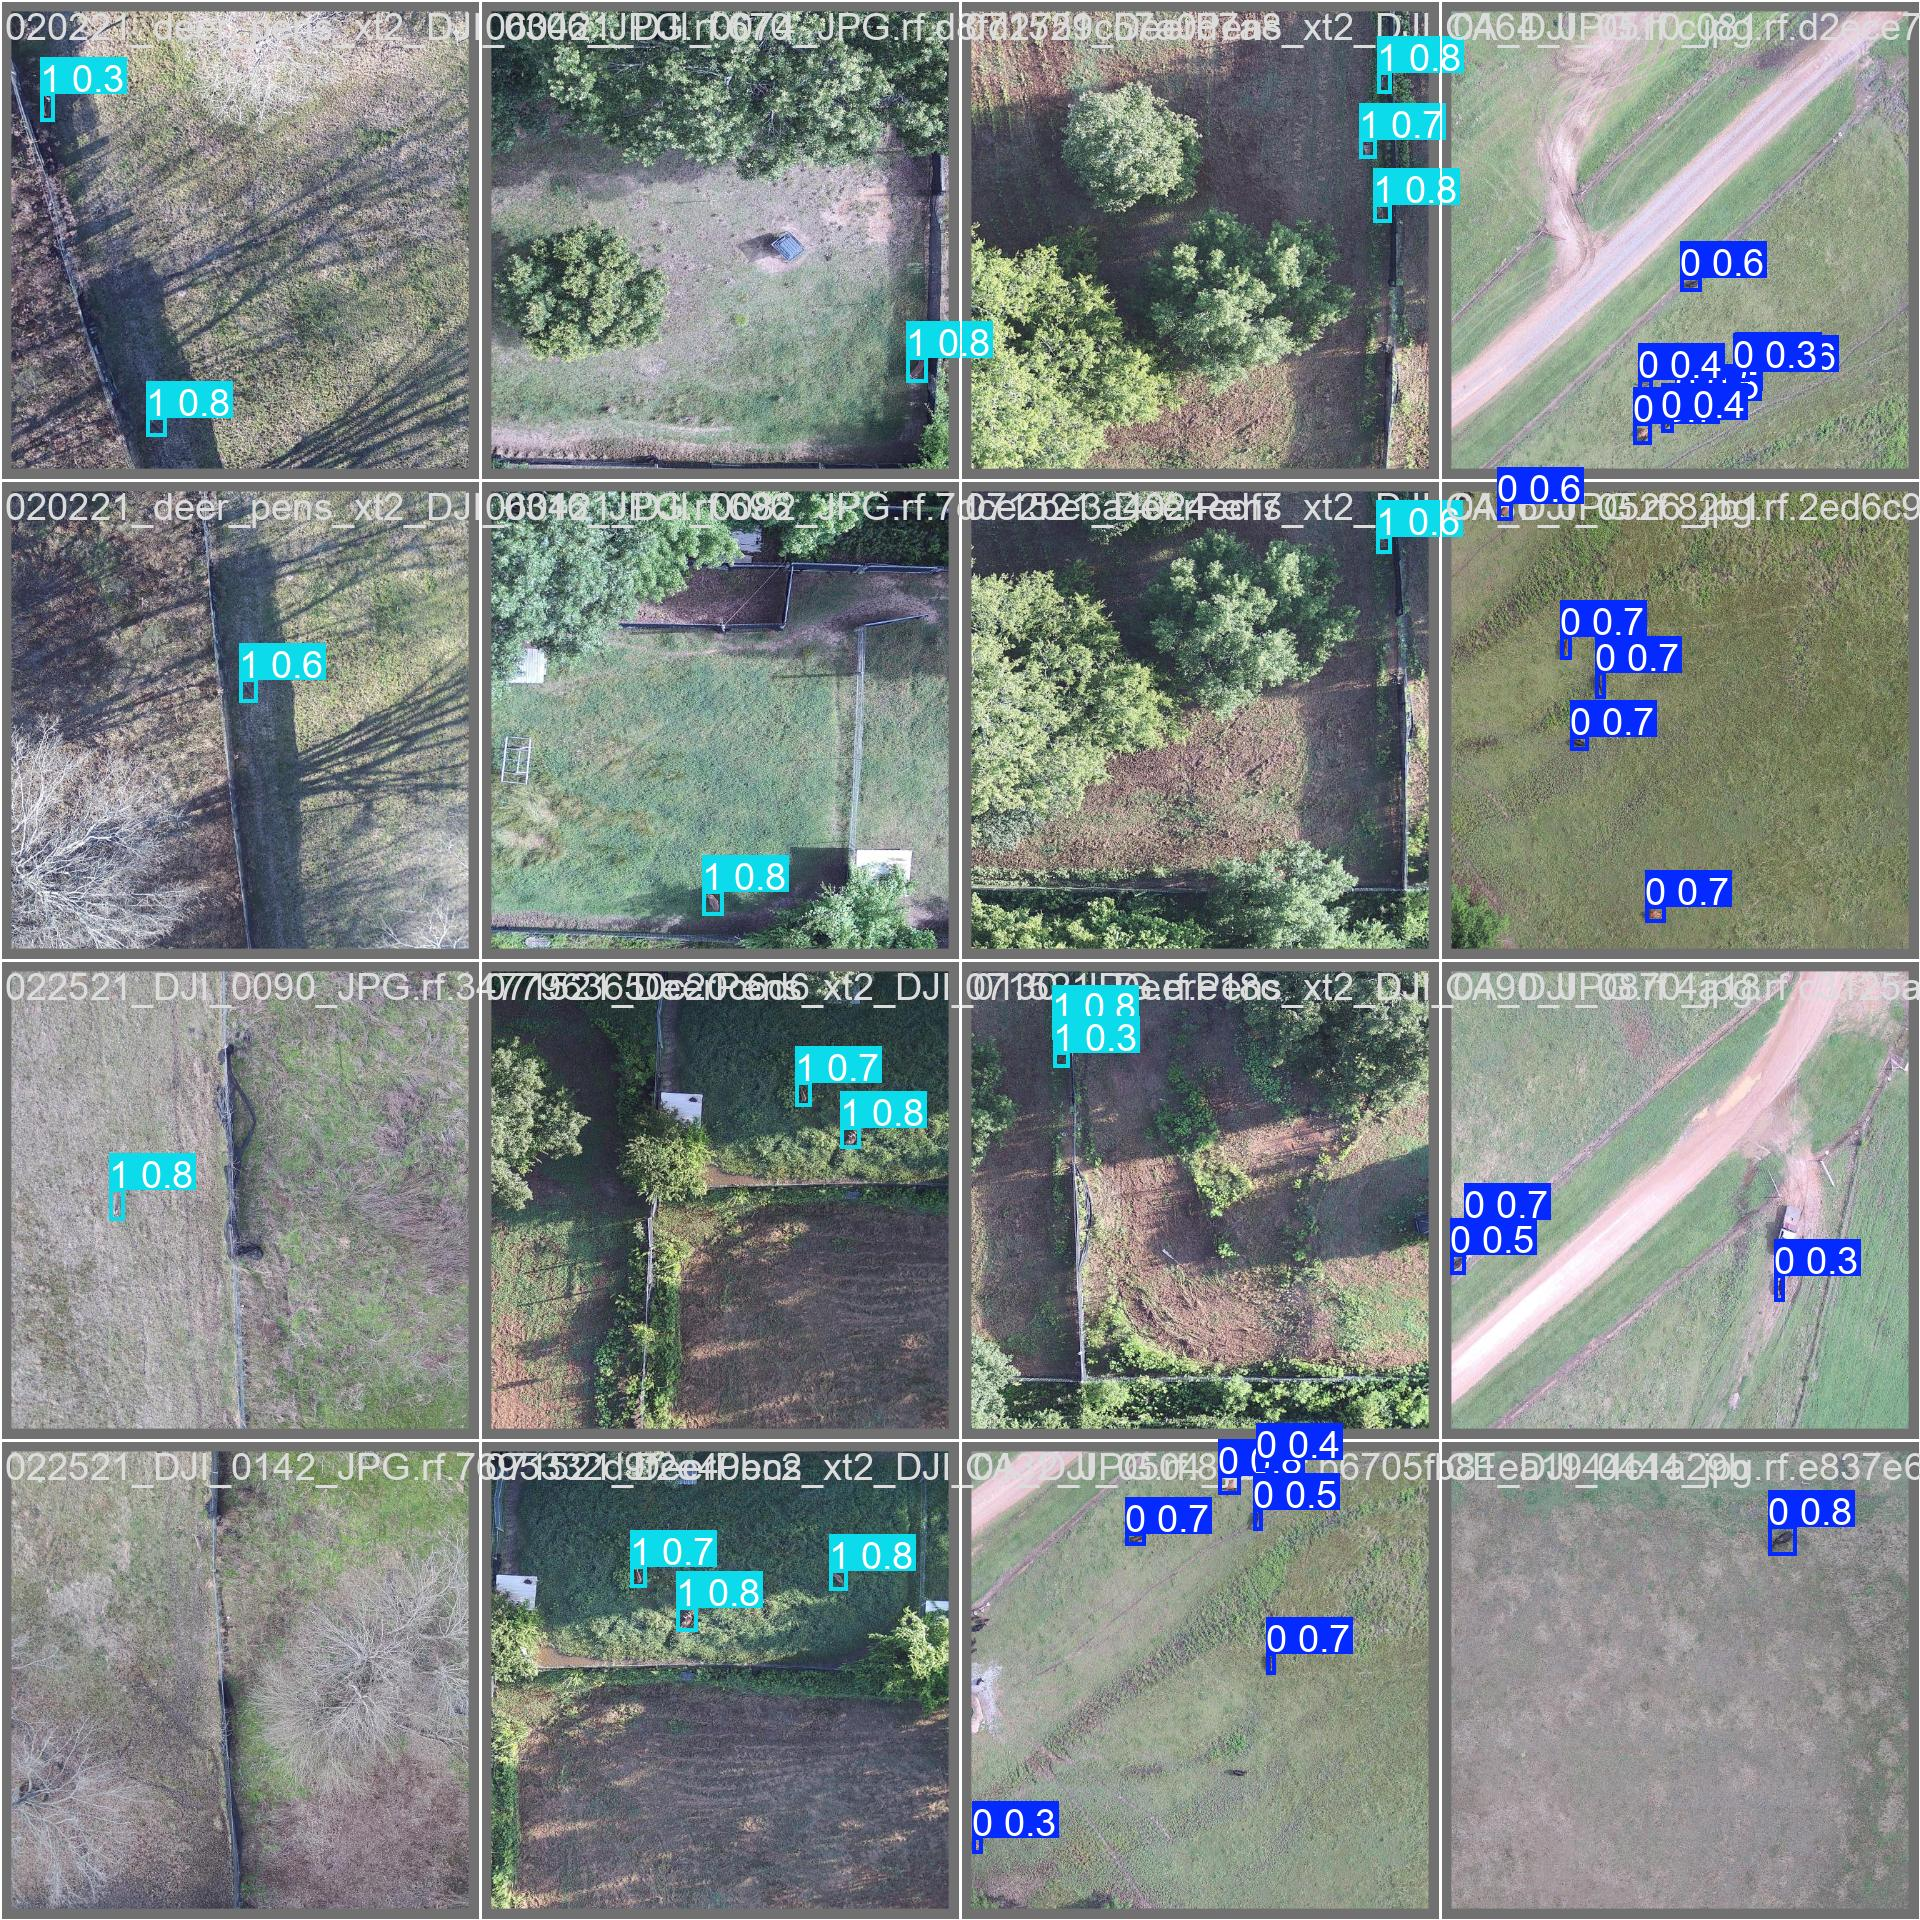

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [12]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/tp_final_wildlife_rgb-4/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.16it/s]
                   all         33         78      0.882      0.885      0.899      0.516
                     0         13         36      0.738      0.806       0.84       0.36
                     1         11         17      0.935       0.85      0.862      0.403
                     2          9         25      0.972          1      0.995      0.784
Speed: 16.2ms preprocess, 20.5ms inference, 0.0ms loss, 22.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/16 /content/datasets/tp_final_wildlife_rgb-4/test/images/022521_DJI_0082_JPG.rf.43fa31afd4ab446a5488b36b95ff247a.jpg: 640x640 2 1s, 15.6ms
image 2/16 /content/datasets/tp_final_wildlife_rgb-4/test/images/060421_DJI_0072_JPG.rf.126c66f34f7f13ea3fc4156440cb4dcc.jpg: 640x640 1 1, 15.6ms
image 3/16 /content/datasets/tp_final_wildlife_rgb-4/test/images/060421_DJI_0724_JPG.rf.9b4563cff39c5ac55cb67f0af6a539fe.jpg: 640x640 1 1, 15.6ms
image 4/16 /content/datasets/tp_final_wildlife_rgb-4/test/images/071521_DeerPens_xt2_DJI_0400_JPG.rf.51b203059af8f20400ba5ba692236f68.jpg: 640x640 3 1s, 15.5ms
image 5/16 /content/datasets/tp_final_wildlife_rgb-4/test/images/071521_DeerPens_xt2_DJI_0558_JPG.rf.4821e36006ca5a48b85ebc2c4f72f705.jpg: 640x640 1 1, 15.5ms
image 6/16 /content/datasets/tp_final_wildlife_rgb-4/test/images/CA_DJI_049

**NOTE:** Let's take a look at few results.

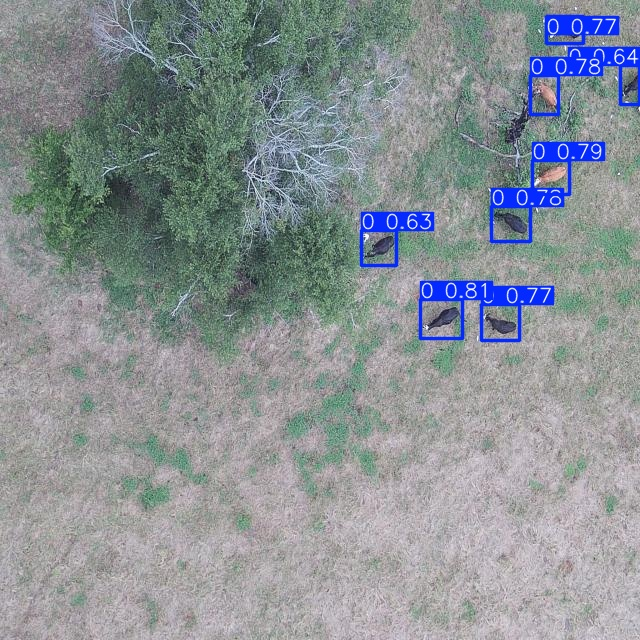

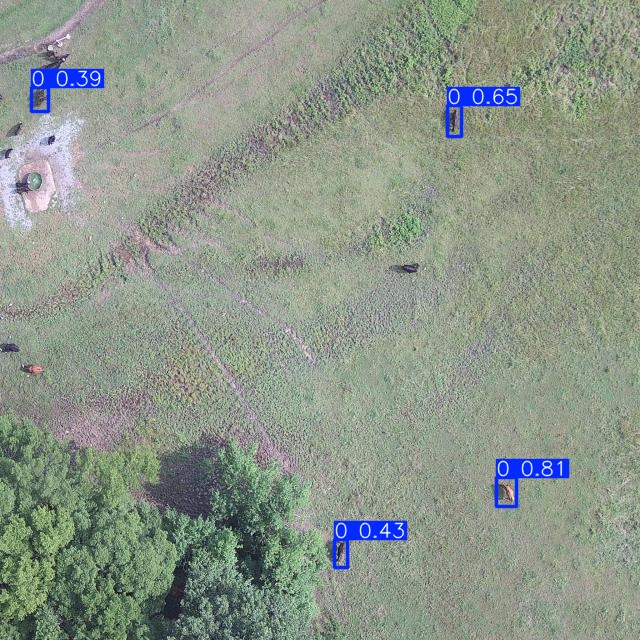

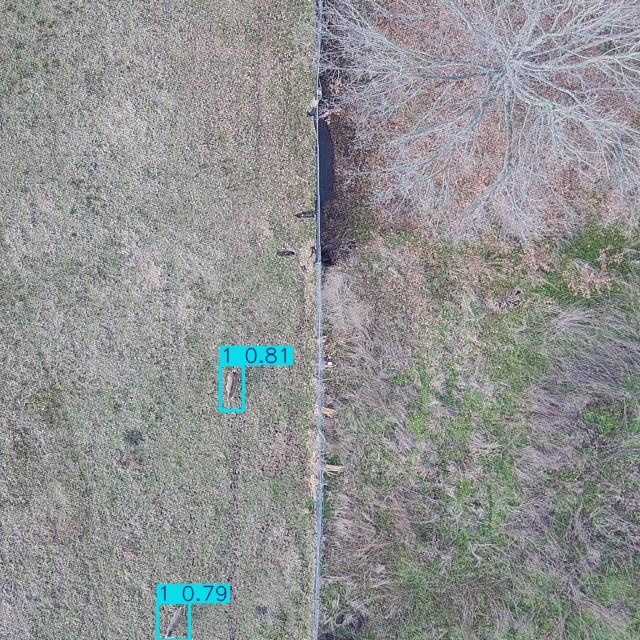

In [14]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")